In [1]:
#import libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.interpolate as interp
import gzip
import pickle as pkl

In [2]:
# load data
file = gzip.GzipFile('GlobalTemperatureData.pkl.gz','rb')
df = pkl.load(file)
file.close

<bound method GzipFile.close of <gzip _io.BufferedReader name='GlobalTemperatureData.pkl.gz' 0x1ff108bd580>>

In [3]:
df.keys()

dict_keys(['YR1881', 'YR1882', 'YR1883', 'YR1884', 'YR1885', 'YR1886', 'YR1887', 'YR1888', 'YR1889', 'YR1890', 'YR1891', 'YR1892', 'YR1893', 'YR1894', 'YR1895', 'YR1896', 'YR1897', 'YR1898', 'YR1899', 'YR1900', 'YR1901', 'YR1902', 'YR1903', 'YR1904', 'YR1905', 'YR1906', 'YR1907', 'YR1908', 'YR1909', 'YR1910', 'YR1911', 'YR1912', 'YR1913', 'YR1914', 'YR1915', 'YR1916', 'YR1917', 'YR1918', 'YR1919', 'YR1920', 'YR1921', 'YR1922', 'YR1923', 'YR1924', 'YR1925', 'YR1926', 'YR1927', 'YR1928', 'YR1929', 'YR1930', 'YR1931', 'YR1932', 'YR1933', 'YR1934', 'YR1935', 'YR1936', 'YR1937', 'YR1938', 'YR1939', 'YR1940', 'YR1941', 'YR1942', 'YR1943', 'YR1944', 'YR1945', 'YR1946', 'YR1947', 'YR1948', 'YR1949', 'YR1950', 'YR1951', 'YR1952', 'YR1953', 'YR1954', 'YR1955', 'YR1956', 'YR1957', 'YR1958', 'YR1959', 'YR1960', 'YR1961', 'YR1962', 'YR1963', 'YR1964', 'YR1965', 'YR1966', 'YR1967', 'YR1968', 'YR1969', 'YR1970', 'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976', 'YR1977', 'YR1978', 'YR1979',

In [4]:
YR = list(df.keys())
print(YR)

['YR1881', 'YR1882', 'YR1883', 'YR1884', 'YR1885', 'YR1886', 'YR1887', 'YR1888', 'YR1889', 'YR1890', 'YR1891', 'YR1892', 'YR1893', 'YR1894', 'YR1895', 'YR1896', 'YR1897', 'YR1898', 'YR1899', 'YR1900', 'YR1901', 'YR1902', 'YR1903', 'YR1904', 'YR1905', 'YR1906', 'YR1907', 'YR1908', 'YR1909', 'YR1910', 'YR1911', 'YR1912', 'YR1913', 'YR1914', 'YR1915', 'YR1916', 'YR1917', 'YR1918', 'YR1919', 'YR1920', 'YR1921', 'YR1922', 'YR1923', 'YR1924', 'YR1925', 'YR1926', 'YR1927', 'YR1928', 'YR1929', 'YR1930', 'YR1931', 'YR1932', 'YR1933', 'YR1934', 'YR1935', 'YR1936', 'YR1937', 'YR1938', 'YR1939', 'YR1940', 'YR1941', 'YR1942', 'YR1943', 'YR1944', 'YR1945', 'YR1946', 'YR1947', 'YR1948', 'YR1949', 'YR1950', 'YR1951', 'YR1952', 'YR1953', 'YR1954', 'YR1955', 'YR1956', 'YR1957', 'YR1958', 'YR1959', 'YR1960', 'YR1961', 'YR1962', 'YR1963', 'YR1964', 'YR1965', 'YR1966', 'YR1967', 'YR1968', 'YR1969', 'YR1970', 'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976', 'YR1977', 'YR1978', 'YR1979', 'YR1980',

In [5]:
iyr = 0
df_yr = df[YR[iyr]]

In [6]:
df_yr.keys()

Index(['i', 'j', 'lon', 'lat', 'Temperature(i,j)'], dtype='object')

In [7]:
df_yr

i   j  lon  lat  Temperature(i,j)
0        1   1 -179  -89            9999.0
1        2   1 -177  -89            9999.0
2        3   1 -175  -89            9999.0
3        4   1 -173  -89            9999.0
4        5   1 -171  -89            9999.0
...    ...  ..  ...  ...               ...
16195  176  90  171   89            9999.0
16196  177  90  173   89            9999.0
16197  178  90  175   89            9999.0
16198  179  90  177   89            9999.0
16199  180  90  179   89            9999.0

[16200 rows x 5 columns]

In [8]:
data = df_yr[['lon','lat','Temperature(i,j)']].to_numpy()

In [9]:
data

array([[-179.,  -89., 9999.],
       [-177.,  -89., 9999.],
       [-175.,  -89., 9999.],
       ...,
       [ 175.,   89., 9999.],
       [ 177.,   89., 9999.],
       [ 179.,   89., 9999.]])

In [10]:
data[np.where(data>999)] = np.nan

In [11]:
data

array([[-179.,  -89.,   nan],
       [-177.,  -89.,   nan],
       [-175.,  -89.,   nan],
       ...,
       [ 175.,   89.,   nan],
       [ 177.,   89.,   nan],
       [ 179.,   89.,   nan]])

In [15]:
# grid
x = np.linspace(-180,180,100)
y = np.linspace(-90,90,100)
grid_x, grid_y = np.meshgrid(x,y)

In [16]:
# data interpolate
data_interp = interp.griddata(data[:,[0,1]],data[:,2],(grid_x, grid_y), method= 'linear')

AttributeError: 'NoneType' object has no attribute 'close'

Exception ignored in: 'scipy.spatial.qhull._Qhull.__dealloc__'
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scipy\interpolate\ndgriddata.py", line 260, in griddata
    ip = LinearNDInterpolator(points, values, fill_value=fill_value,
AttributeError: 'NoneType' object has no attribute 'close'


OSError: Failed to open file b'C:\\Users\\\xeb\xb0\x95\xeb\xaf\xbc\xea\xb7\x9c\\AppData\\Local\\Temp\\scipy-rnd_0579'

NameError: name 'grid_y' is not defined

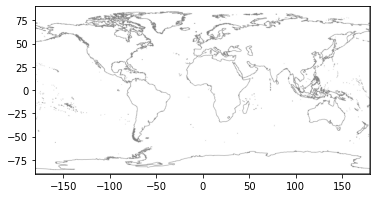

In [14]:
# plot 
hfig, hax = plt.subplots()
im = plt.imread("world_map.png")
plt.imshow(np.flipud(im),origin='lower', extent=(-180,180,-90,90))
plt.pcolormesh(grid_x, grid_y, data_interp,cmap=coolwarm, alpha=0.7)
plt.xlim(-100,100)
plt.ylim(-90,90)
plt.title('Global Temperature Change From YR1880 To' + str(YR[iyr]))
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.colorbar(fraction= 0.022, pad= 0.05)
plt.clim(-4,4)

# Animated Graph

TypeError: __init__() got an unexpected keyword argument 'frame'

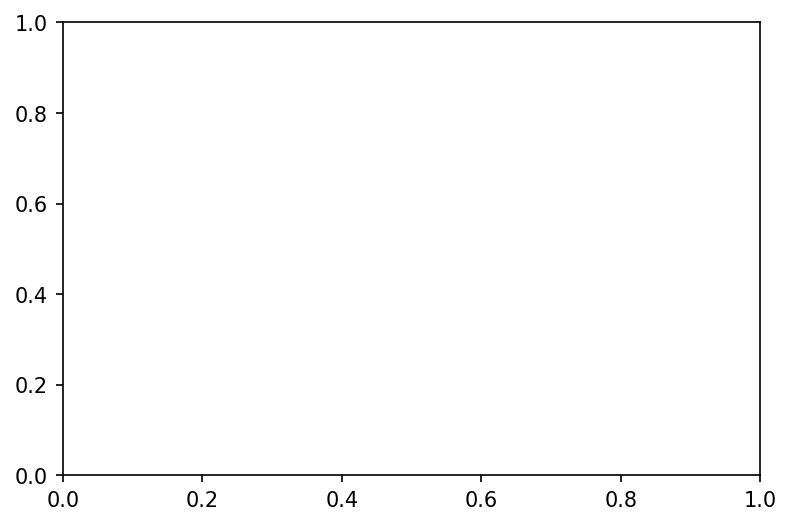

In [69]:
import matplotlib.animation
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 100 # in megabite
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['figure.dpi'] = 150
plt.ioff()

hfig, hax = plt.subplots()

def animate(iyr):
    df_yr = df[YR[iyr]]
    data = df_yr[['lon','lat','Temperature(i,j)']].to_numpy()
    data[np.where(data>999)] = np.nan
    data_interp = interp.griddata(data[:,[0,1]],data[:,2],(grid_x, grid_y), method= 'linear')
    
    plt.clf()
    plt.cla()
    
    plt.imshow(np.flipud(im),origin='lower', extent=(-180,180,-90,90))
    plt.pcolormesh(grid_x, grid_y, data_interp,cmap='coolwarm', alpha=0.7, edgecolor=None)
    
    plt.xlin(-100,100)
    plt.ylim(-90,90)
    plt.title('Global Temperature Change From YR1880 To' + str(YR[iyr]))
    plt.ylabel('Longitude')
    plt.xlabel('Latitude')
    plt.colorbar(fraction= 0.022, pad= 0.05)
    plt.clim(-4,4)

matplotlib.animation.FuncAnimation(hfig, animate, frame=10)   